from https://www.kaggle.com/code/datguyprasham/vgg16-70-30

this notebook appears to be test/train splitting the training set.
pytorch-lightning

In [1]:
!module list

Currently Loaded Modulefiles:
 1) courses/cs435/pa3   3) ide/visual-studio-code  
 2) python/bundle-3.9   4) cuda/11.2               
>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import keras
import tensorflow as tf
import os
import glob


from tensorflow.keras.applications.vgg16 import VGG16
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

from pprint import pprint


from pathlib import Path

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-11-10 14:16:42.349219: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-10 14:16:42.551335: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-10 14:16:42.551603: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [4]:
# image_dir = Path("../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")
image_dir = Path("/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/")
train_dir = Path("/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/train")
val_dir = Path("/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/valid")
test_dir = Path("/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/test")

train_dir

PosixPath('/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/train')

In [6]:
pipeline_params = {
    'labels': 'inferred',
    'label_mode': 'int',
    'batch_size': 16,
    'image_size': (224, 224),
    'shuffle': True
}

train_pipeline = tf.keras.utils.image_dataset_from_directory(
    f'{train_dir}',
    **pipeline_params
)

valid_pipeline = tf.keras.utils.image_dataset_from_directory(
    f'{val_dir}',
    **pipeline_params
)

test_pipeline = tf.keras.utils.image_dataset_from_directory(
    f'{test_dir}',
    **pipeline_params
)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.
Found 0 files belonging to 0 classes.


ValueError: No images found in directory /s/bach/a/class/cs435/cs435a/CS435_Plant_Data/test. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [5]:
# filepaths = list(image_dir.glob(r'**/*.JPG'))
# labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

# filepaths = pd.Series(filepaths, name='Filepath').astype(str)
# labels = pd.Series(labels, name='Label')

# images = pd.concat([filepaths, labels], axis=1)

In [6]:
# images

,Filepath,Label
0,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,Apple___Apple_scab
1,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,Apple___Apple_scab
2,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,Apple___Apple_scab
3,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,Apple___Apple_scab
4,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,Apple___Apple_scab
...,...,...
84849,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,test
84850,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,test
84851,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,test
84852,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/...,test


In [9]:
# train_df, test_df = train_test_split(images, train_size=0.7, shuffle=True, random_state=1)

In [10]:
# local_weights_file = '../input/inceptionv3-imagenet-weights/inception_v3_weights.h5' #what is this

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1/255)

In [12]:
batch_size = 32

In [13]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(150, 150),
    color_mode="rgb",
    shuffle=True,
    subset='training'
)

validation_generator =  train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(150, 150),
    color_mode="rgb",
    shuffle=True,
    subset='validation'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(150, 150),
    color_mode="rgb",
    shuffle=False
)

Found 37995 validated image filenames belonging to 38 classes.
Found 9498 validated image filenames belonging to 38 classes.
Found 20355 validated image filenames belonging to 38 classes.


In [14]:
class_dict = train_generator.class_indices
pprint(class_dict)

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [15]:
train_num = train_generator.samples
valid_num = validation_generator.samples

In [16]:
# # Creating Instence of pre-trained model from Keras Application
# vgg_model = VGG16(input_shape=(150, 150, 3),
#                                 include_top=False,
#                                 weights=None)

# inception_model.load_weights(local_weights_file)

base_model=tf.keras.applications.VGG16(weights="imagenet",include_top=False,input_shape=(150,150,3))
base_model.trainable=False

2023-11-10 12:28:57.066663: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-10 12:28:57.068824: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-10 12:28:57.069027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-10 12:28:57.069162: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [17]:
vgg_model=keras.models.Sequential()
vgg_model.add(base_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(4096,activation='relu'))
vgg_model.add(Dense(4096,activation='relu'))
vgg_model.add(Dense(38,activation='softmax'))
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 4096)              33558528  
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_2 (Dense)             (None, 38)                155686    
                                                                 
Total params: 65,210,214
Trainable params: 50,495,526
Non-trainable params: 14,714,688
_________________________________________________________________


In [18]:
vgg_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
from keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='val_accuracy',
                              min_delta=.1,
                              patience=3,
                              mode='max',
                              restore_best_weights=True
                              )

In [21]:
import scipy
history = vgg_model.fit(
    train_generator,
    steps_per_epoch=train_num//batch_size,
    validation_data=validation_generator,
    epochs=1,
    validation_steps=valid_num//batch_size,
    callbacks=[earlystopping]
)

2023-11-10 12:29:24.129916: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201


1187/1187 [==============================] - 480s 396ms/step - loss: 1.1138 - accuracy: 0.6566 - val_loss: 0.6436 - val_accuracy: 0.7845


In [22]:
# filepath="Mymodel.h5"
# vgg_model.save(filepath)

In [23]:
from sklearn.metrics import accuracy_score

test_generator.reset()
pred = vgg_model.predict_generator(
    test_generator,
    verbose=1
)

predicted_class_indices = np.argmax(pred, axis=1)
true_class_indices = test_generator.classes

test_acc = accuracy_score(true_class_indices, predicted_class_indices)
print('Test accuracy:', test_acc)

/tmp/ipykernel_1981676/3650955483.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = vgg_model.predict_generator(


637/637 [==============================] - 125s 196ms/step
Test accuracy: 0.8214197985752886


In [24]:
from sklearn.metrics import classification_report

true_labels = test_generator.labels

report = classification_report(true_labels, predicted_class_indices, target_names=test_generator.class_indices)
print(report)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.79      0.82      0.80       638
                                 Apple___Black_rot       0.78      0.91      0.84       601
                          Apple___Cedar_apple_rust       0.91      0.73      0.81       536
                                   Apple___healthy       0.82      0.89      0.85       627
                               Blueberry___healthy       0.87      0.91      0.89       567
          Cherry_(including_sour)___Powdery_mildew       0.98      0.83      0.90       492
                 Cherry_(including_sour)___healthy       0.85      0.99      0.92       539
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.82      0.88       420
                       Corn_(maize)___Common_rust_       0.96      1.00      0.98       569
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.89      0.

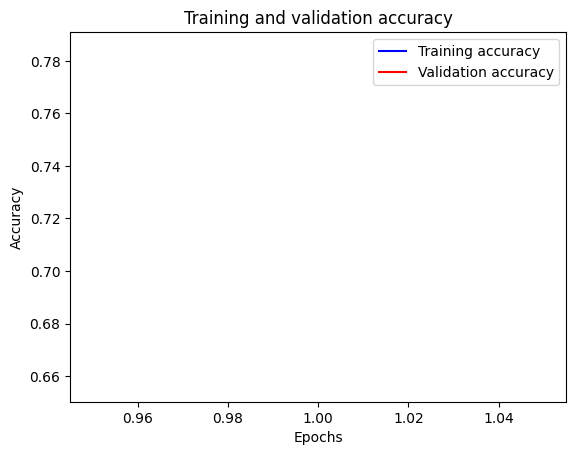

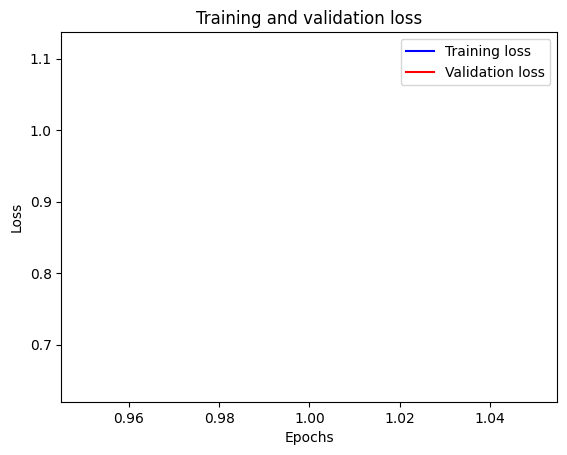

In [25]:
# Plotting accuracy vs epochs
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss vs epochs
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
data = {'acc': acc, 'loss': loss, 'val_acc': val_acc, 'val_loss': val_loss}
df = pd.DataFrame(data)

df.to_csv('InceptionV3-80_20.csv', index=False)

In [27]:
avg_acc = sum(df['acc']) / len(df['acc'])
avg_val_acc = sum(df['val_acc']) / len(df['val_acc'])

avg_loss = sum(df['loss']) / len(df['loss'])
avg_val_loss = sum(df['val_loss']) / len(df['val_loss'])

print('Mean acc: ', avg_acc)
print('Mean val acc: ', avg_val_acc)

print('Mean loss: ', avg_loss)
print('Mean val loss: ', avg_val_loss)

Mean acc:  0.6566393375396729
Mean val acc:  0.7845228314399719
Mean loss:  1.1138005256652832
Mean val loss:  0.6436247825622559
